In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from pprint import pprint
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
red_wine=pd.read_csv("winequality-red.csv",sep=";")
white_wine=pd.read_csv("winequality-white.csv",sep=";")
#Column renaming according to usual conventions
red_wine.columns=red_wine.columns.str.replace(" ","_")
white_wine.columns=white_wine.columns.str.replace(" ","_")
#Categorization of quality into three groups
red_wine["quality_label"] = red_wine["quality"].apply(lambda value: 0 if value<=5 else 1 if value< 7 else 2)
white_wine["quality_label"]=white_wine["quality"].apply(lambda value: 0 if value<=5 else 1 if value< 7 else 2)
red_wine["quality_label"]=pd.Categorical(red_wine["quality_label"],categories=[0,1,2])
white_wine["quality_label"]=pd.Categorical(white_wine["quality_label"],categories=[0,1,2])
#Feature "Crisp" denotes the acidity of a wine over its sweetness/dryness
white_wine["crisp"]=white_wine["volatile_acidity"]/white_wine["residual_sugar"]
#Combining the two wine databases
wines=pd.concat([red_wine,white_wine])
wines=wines.sample(frac=1,random_state=42).reset_index(drop=True)


In [24]:
#Data is normalised since distribution for all except pH is skewed
#Normalisation only has a noticeable impact in non RF methods, and it's better with StandardScaler
#However it results in lost of variance, concentrating most wines in one quality
#If not normalised, the accuracy is less than 50%. With normalisation it it around 57%.
norm=StandardScaler()
norm_fit=norm.fit(xtrain)
xtrain_norm=norm_fit.transform(xtrain)
xtest_norm=norm_fit.transform(xtest)

In [61]:
x=white_wine.drop(["quality","quality_label","volatile_acidity","residual_sugar"],axis=1)
y=white_wine["quality"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain_norm=xtrain
xtest_norm=xtest

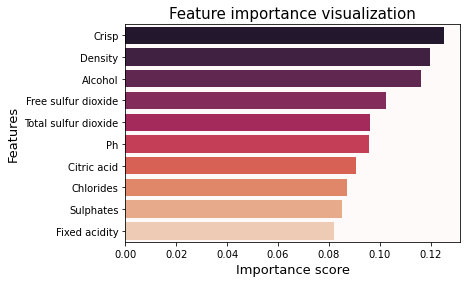

In [58]:
#Feature visualization for RF
temp=RandomForestClassifier(n_estimators=100)
temp.fit(xtrain,ytrain)
feature_imp=pd.Series(temp.feature_importances_,index=x.columns[:11]).sort_values(ascending=False)
feature_imp.index=feature_imp.index.str.replace("_"," ")
feature_imp.index=feature_imp.index.str.capitalize()
sns.barplot(x=feature_imp,y=feature_imp.index,palette="rocket",color="snow").set_facecolor(color="snow")
plt.xlabel("Importance score",fontsize=13)
plt.ylabel("Features",fontsize=13)
plt.title("Feature importance visualization",fontsize=15)
plt.show()

In [5]:
# RandomizedSearch parameter tuning
# n_estimators=[200,400,600,800,1000]
# max_features=["auto","sqrt","log2",0.3]
# max_depth=[int(x) for x in np.linspace(10,100,num=10)]
# max_depth.append(None)
# min_samples_split=[1,2,3,4,5]
# min_samples_leaf=[1,2,3,4]
# bootstrap=[True,False]
# grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,
# "min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"bootstrap":bootstrap}
# rf=RandomForestRegressor()
# random_grid=RandomizedSearchCV(estimator=rf,param_distributions=grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
# random_grid.fit(xtrain,ytrain)
# print(random_grid.best_params_)

In [6]:
# #GridSearch parameter tuning
# n_estimators=[500,600,700]
# max_features=["auto","log2",0.3]
# max_depth=[50,60,70]
# min_samples_split=[1,2,3]
# min_samples_leaf=[2,3,4]
# bootstrap=[False,True]
# best_grid={"bootstrap":bootstrap,"max_depth":max_depth,"max_features":max_features,"min_samples_leaf":min_samples_leaf,
# "min_samples_split":min_samples_split,"n_estimators":n_estimators}
# rf=RandomForestRegressor()
# grid_search=GridSearchCV(estimator=rf,param_grid=best_grid,cv=3,n_jobs=-1,verbose=2)
# grid_search.fit(xtrain_norm,ytrain)
# print(grid_search.best_params_)

In [7]:
#Hyperparamater for quality label depending on dataset:
    #RED WINES
strap=False
depth=60
features="log2"
samples_leaf=1
samples_split=3
estimators=900
oob=False
    #WHITE WINES
strap=False
depth=50
features="log2"
samples_leaf=1
samples_split=2
estimators=700
oob=False
    #COMBINED
strap=False
depth=50
features="log2"
samples_leaf=2
samples_split=3
estimators=700
oob=False
#Hyperparamater for quality depending on dataset:
    #RED WINES
strap=False
depth=100
features="sqrt"
samples_leaf=2
samples_split=2
estimators=1000
oob=False
    #WHITE WINES
strap=False
depth=50
features="log2"
samples_leaf=2
samples_split=3
estimators=700
oob=False
    #COMBINED
strap=False
depth=60
features=0.3
samples_leaf=2
samples_split=2
estimators=600
oob=False

In [8]:
#Quality_Label_Red=70%
#Quality_Label_White=74%
#Quality_Label_Combined=71%
#Quality_Red=69%
#Quality_White=70%
#Quality_Combined=69%

In [18]:
strap=False
depth=50
features="log2"
samples_leaf=2
samples_split=3
estimators=700
oob=False

0.6918367346938775
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.54      0.28      0.37        25
           5       0.70      0.67      0.69       291
           6       0.67      0.79      0.72       432
           7       0.76      0.61      0.68       192
           8       0.83      0.43      0.57        35

    accuracy                           0.69       980
   macro avg       0.58      0.46      0.50       980
weighted avg       0.69      0.69      0.69       980



c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


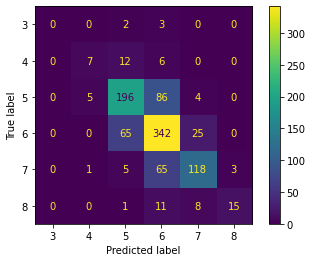

In [60]:
rf=RandomForestClassifier(n_estimators=estimators,max_depth=depth,max_features=features,
min_samples_leaf=samples_leaf,min_samples_split=samples_split,bootstrap=strap,oob_score=oob,n_jobs=-1)
rf.fit(xtrain_norm,ytrain)
pred_rf=rf.predict(xtest_norm)
a_rf=accuracy_score(ytest,pred_rf)
print(a_rf)
print(classification_report(ytest,pred_rf))
plot_confusion_matrix(rf,xtest,ytest)
plt.show()

c:\Users\giorg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

0.556923076923077
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        42
           5       0.58      0.61      0.60       405
           6       0.55      0.72      0.62       597
           7       0.51      0.23      0.32       213
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         0

    accuracy                           0.56      1300
   macro avg       0.23      0.22      0.22      1300
weighted avg       0.52      0.56      0.52      1300



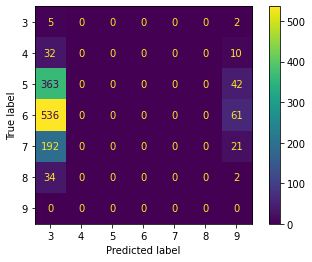

In [10]:
#Logistic Regreession ~55%
lr=LogisticRegression()
lr.fit(xtrain_norm,ytrain)
pred_lr=lr.predict(xtest_norm)
a_lr=accuracy_score(ytest,pred_lr)
print(a_lr)
print(classification_report(ytest,pred_lr))
plot_confusion_matrix(lr,xtest,ytest)
plt.show()

0.5892307692307692
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.23      0.29      0.26        42
           5       0.60      0.66      0.63       405
           6       0.65      0.62      0.63       597
           7       0.57      0.48      0.52       213
           8       0.33      0.36      0.34        36

    accuracy                           0.59      1300
   macro avg       0.39      0.40      0.40      1300
weighted avg       0.59      0.59      0.59      1300



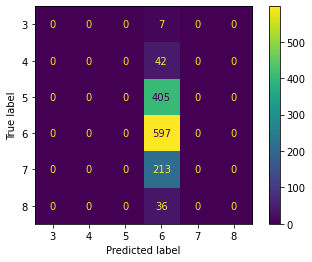

In [11]:
#SVC ~57%
svc=SVC(C=1000)
svc.fit(xtrain_norm,ytrain)
pred_svc=svc.predict(xtest_norm)
a_svc=accuracy_score(ytest,pred_svc)
print(a_svc)
print(classification_report(ytest,pred_svc))
plot_confusion_matrix(svc,xtest,ytest)
plt.show()

0.5418367346938775
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.59      0.55      0.57       291
           6       0.52      0.73      0.61       432
           7       0.52      0.30      0.38       192
           8       0.00      0.00      0.00        35

    accuracy                           0.54       980
   macro avg       0.27      0.26      0.26       980
weighted avg       0.51      0.54      0.51       980



c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


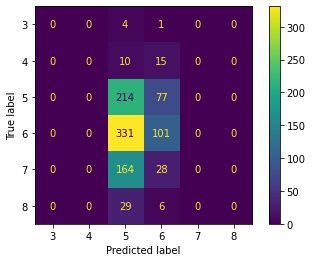

In [26]:
#KNN ~58%
knn=KNeighborsClassifier(n_neighbors=50,leaf_size=20)
knn.fit(xtrain_norm,ytrain)
pred_knn=knn.predict(xtest_norm)
a_knn=accuracy_score(ytest,pred_knn)
print(a_knn)
print(classification_report(ytest,pred_knn))
plot_confusion_matrix(knn,xtest,ytest)
plt.show()

Text(0.5, 1.0, 'Comperative accuracy of different models')

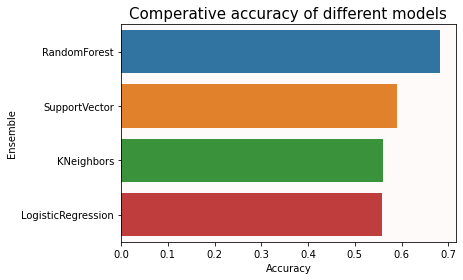

In [13]:
%matplotlib inline
mods=pd.DataFrame({"Ensemble":["RandomForest","LogisticRegression","SupportVector","KNeighbors"],"Accuracy":[a_rf,a_lr,a_svc,a_knn]})
mods.sort_values(by="Accuracy",ascending=False,inplace=True)
sns.barplot(x="Accuracy",y="Ensemble",data=mods).set_facecolor(color="snow")
plt.title("Comperative accuracy of different models",fontsize=15)